In [51]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [53]:
#Download Data file from https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv

url = 'https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv'
r = requests.get(url)

#save file
with open('covid19-download.csv', 'wb') as f:
    f.write(r.content)

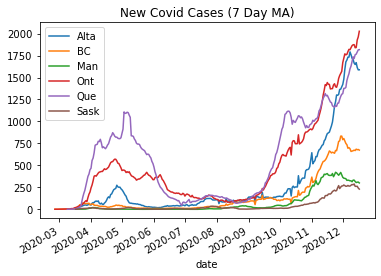

In [54]:
#read file into data frame, pivot to new cases per day with provinces as columns    
cancovid19 = pd.read_csv("covid19-download.csv", index_col = 'date', parse_dates = True)
cancovid19 = pd.pivot_table(cancovid19, values='numtoday', index='date',columns='prname')

#rename columns 
cancovid19.columns = ['Alta','BC','Canada','Man','NB','NL','NWT','NS','Nvt','Ont','PEI','Que','Travellers','Sask','YT']

#drop columns to leave just the 6 largest provinces
cancovid19.drop(columns = ['Canada','Travellers','NWT','NB','PEI','NS','YT','Nvt','NL'], inplace = True)

#BC reports '0' cases on Saturday and Sunday. Replace with null values.

if cancovid19.index[-1].weekday() in (5,6):
    cancovid19.iloc[-1,1] = np.nan
    if cancovid19.index[-2].weekday() in (5,6):
        cancovid19.iloc[-2,1] = np.nan

#calculate 7 day moving averages
cancovid19MA7 = cancovid19.rolling(window=7).mean()

#plot 7 day MA covid cases by day
ax = cancovid19MA7.plot()
plt.title('New Covid Cases (7 Day MA)')
plt.savefig('covid7day')


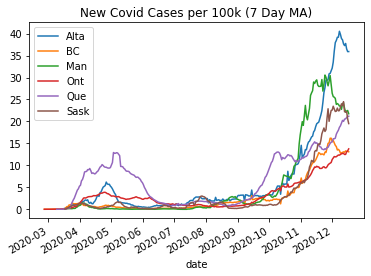

In [55]:
#create new dataframe scaling new cases to per 100k numbers
provincepop = {'Alta': 0.022614, 'BC': 0.019425, 'Sask': 0.084889, 'Man':0.072516, 'Ont':0.006787, 'Que': 0.011663}
cancovid19MA7capita = cancovid19MA7.mul(provincepop)

#plot 7 day MA covid cases per 100k
ax = cancovid19MA7capita.plot()
plt.title('New Covid Cases per 100k (7 Day MA)')
plt.savefig('covid7daypercapita')

In [59]:
#Calculate Total Confirmed Covid cases per 100,000 for each province.
provTotals = cancovid19.sum()
provincepopS = pd.Series(provincepop)
casesCapita = provTotals.mul(provincepopS)
casesCapita

Alta    1948.444854
BC       869.637825
Man     1598.760252
Ont     1011.039029
Que     1994.699564
Sask    1089.295648
dtype: float64